In [1]:
import torch
from torchvision import transforms
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
from timm.data import create_transform
from timm.data.transforms import _pil_interp
from classification.focal_transformer_eccv_lrf_interpret import FocalTransformer, build_transforms, build_transforms4display
from classification.focal_transformer_eccv_iso_interpret import FocalTransformer as FocalTransformerISO
from classification.focal_transformer_eccv_lrf_interpret4large import FocalTransformer as FocalTransformer4Large

In [6]:
# initialize model
img_size = 384
model = FocalTransformer4Large(img_size=img_size, embed_dim=128, depths=[2,2,18,2], drop_path_rate=0.2, 
    focal_levels=[3,3,3,3],                         
    focal_windows=[7,5,3,3], 
    use_conv_embed=False, 
    use_layerscale=True,
).cuda()

# img_size = 224
# model = FocalTransformerISO(img_size=img_size, embed_dim=768, depths=[12], drop_path_rate=0.2, patch_size=16, 
#                 use_layerscale=True, focal_levels=[3], focal_windows=[3], 
#     use_conv_embed=False, use_shift=False, 
# ).cuda()

In [7]:
# build data transform
eval_transforms = build_transforms(img_size)
display_transforms = build_transforms4display(img_size)

In [8]:
print(model)

FocalTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
    (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (layers): ModuleList(
    (0): BasicLayer(
      dim=128, input_resolution=(96, 96), depth=2
      (blocks): ModuleList(
        (0): FocalTransformerBlock(
          dim=128, input_resolution=(96, 96), num_heads=3, window_size=7, shift_size=0, mlp_ratio=4.0
          (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (attn): FocalConvolution(
            dim=128, window_size=(7, 7), num_heads=3
            (pre_conv): Linear(in_features=128, out_features=260, bias=True)
            (v): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
            (act): GELU()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=128, out_features=128, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)

In [5]:
# load checkpoint
# ckpt_path = "/datadrive/azureblobs/model_storage2/projects/focalv3/amlt-results/7354148258.48326-4bb8c2e2-6002-4e5c-a1a1-151bd5f1be3b/ckpt_epoch_297.pth"
# ckpt_path = "/datadrive/azureblobs/model_storage2/projects/focalv3/amlt-results/7353990889.94818-401604e3-c104-4210-bd0d-9c0fe9145572/ckpt_epoch_289.pth"
# ckpt_path = "/datadrive/azureblobs/model_storage2/projects/focalv3/amlt-results/7353990889.94818-401604e3-c104-4210-bd0d-9c0fe9145572/ckpt_epoch_289.pth"
# ckpt_path = "/datadrive/azureblobs/model_storage2/projects/focalv3/amlt-results/7352920523.28267-90e08f10-c423-4552-9449-b8f1a3b5d26d/ckpt_epoch_299.pth"
ckpt_path = "/datadrive/azureblobs/model_storage4/cls_focal_eccv_base_chunk_384_0.2_0.001_fl2222_fw7777_on_in22k_n8_g8_v1/base_chunk_384.yaml_conf~/run_6/311850/default/model_state_dict.pt"

ckpt = torch.load(ckpt_path)
model.load_state_dict(ckpt)

RuntimeError: Error(s) in loading state_dict for FocalTransformer:
	size mismatch for layers.0.blocks.0.attn.pool_layers.0.0.weight: copying a param with shape torch.Size([128, 1, 7, 7]) from checkpoint, the shape in current model is torch.Size([128, 1, 3, 3]).
	size mismatch for layers.0.blocks.0.attn.pool_layers.1.0.weight: copying a param with shape torch.Size([128, 1, 9, 9]) from checkpoint, the shape in current model is torch.Size([128, 1, 5, 5]).
	size mismatch for layers.0.blocks.0.attn.pool_layers.2.0.weight: copying a param with shape torch.Size([128, 1, 11, 11]) from checkpoint, the shape in current model is torch.Size([128, 1, 7, 7]).
	size mismatch for layers.0.blocks.1.attn.pool_layers.0.0.weight: copying a param with shape torch.Size([128, 1, 7, 7]) from checkpoint, the shape in current model is torch.Size([128, 1, 3, 3]).
	size mismatch for layers.0.blocks.1.attn.pool_layers.1.0.weight: copying a param with shape torch.Size([128, 1, 9, 9]) from checkpoint, the shape in current model is torch.Size([128, 1, 5, 5]).
	size mismatch for layers.0.blocks.1.attn.pool_layers.2.0.weight: copying a param with shape torch.Size([128, 1, 11, 11]) from checkpoint, the shape in current model is torch.Size([128, 1, 7, 7]).
	size mismatch for layers.1.blocks.0.attn.pool_layers.0.0.weight: copying a param with shape torch.Size([256, 1, 5, 5]) from checkpoint, the shape in current model is torch.Size([256, 1, 3, 3]).
	size mismatch for layers.1.blocks.0.attn.pool_layers.1.0.weight: copying a param with shape torch.Size([256, 1, 7, 7]) from checkpoint, the shape in current model is torch.Size([256, 1, 5, 5]).
	size mismatch for layers.1.blocks.0.attn.pool_layers.2.0.weight: copying a param with shape torch.Size([256, 1, 9, 9]) from checkpoint, the shape in current model is torch.Size([256, 1, 7, 7]).
	size mismatch for layers.1.blocks.1.attn.pool_layers.0.0.weight: copying a param with shape torch.Size([256, 1, 5, 5]) from checkpoint, the shape in current model is torch.Size([256, 1, 3, 3]).
	size mismatch for layers.1.blocks.1.attn.pool_layers.1.0.weight: copying a param with shape torch.Size([256, 1, 7, 7]) from checkpoint, the shape in current model is torch.Size([256, 1, 5, 5]).
	size mismatch for layers.1.blocks.1.attn.pool_layers.2.0.weight: copying a param with shape torch.Size([256, 1, 9, 9]) from checkpoint, the shape in current model is torch.Size([256, 1, 7, 7]).
	size mismatch for layers.3.blocks.0.attn.pool_layers.0.0.weight: copying a param with shape torch.Size([1024, 1, 1, 1]) from checkpoint, the shape in current model is torch.Size([1024, 1, 3, 3]).
	size mismatch for layers.3.blocks.0.attn.pool_layers.1.0.weight: copying a param with shape torch.Size([1024, 1, 3, 3]) from checkpoint, the shape in current model is torch.Size([1024, 1, 5, 5]).
	size mismatch for layers.3.blocks.0.attn.pool_layers.2.0.weight: copying a param with shape torch.Size([1024, 1, 5, 5]) from checkpoint, the shape in current model is torch.Size([1024, 1, 7, 7]).
	size mismatch for layers.3.blocks.1.attn.pool_layers.0.0.weight: copying a param with shape torch.Size([1024, 1, 1, 1]) from checkpoint, the shape in current model is torch.Size([1024, 1, 3, 3]).
	size mismatch for layers.3.blocks.1.attn.pool_layers.1.0.weight: copying a param with shape torch.Size([1024, 1, 3, 3]) from checkpoint, the shape in current model is torch.Size([1024, 1, 5, 5]).
	size mismatch for layers.3.blocks.1.attn.pool_layers.2.0.weight: copying a param with shape torch.Size([1024, 1, 5, 5]) from checkpoint, the shape in current model is torch.Size([1024, 1, 7, 7]).
	size mismatch for head.weight: copying a param with shape torch.Size([21842, 1024]) from checkpoint, the shape in current model is torch.Size([1000, 1024]).
	size mismatch for head.bias: copying a param with shape torch.Size([21842]) from checkpoint, the shape in current model is torch.Size([1000]).

In [61]:
def returnMap(image, weight):
    size_upsample = (224, 224)
    nc, h, w = image.shape
    image[:, :, 0:1] = (weight.cpu() * image[:, :, 0:1])
    
    cam = image.detach().numpy()
    cam_img = (cam - np.min(cam)) / (np.max(cam) - np.min(cam))
    return cam_img

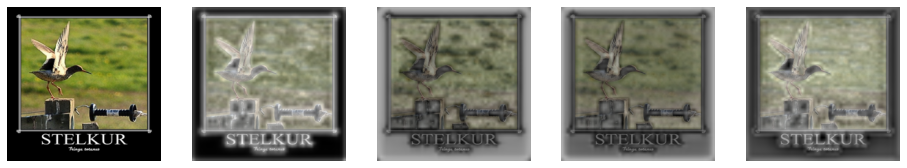

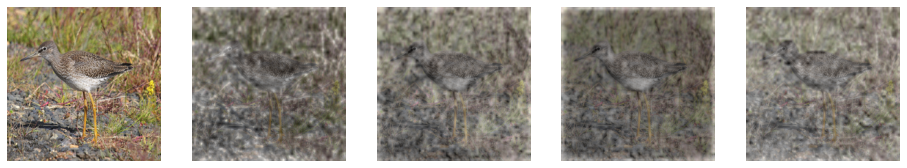

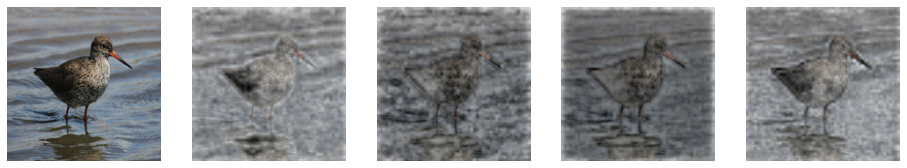

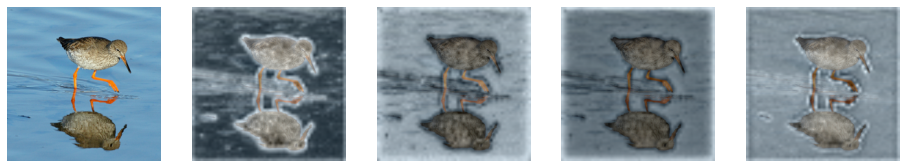

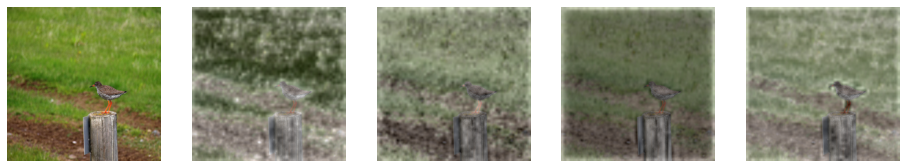

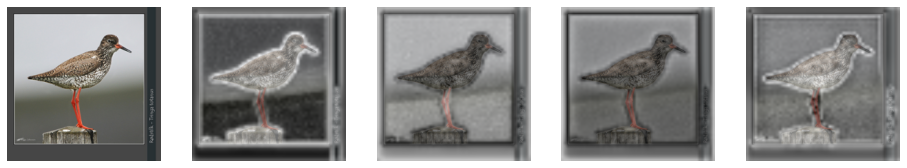

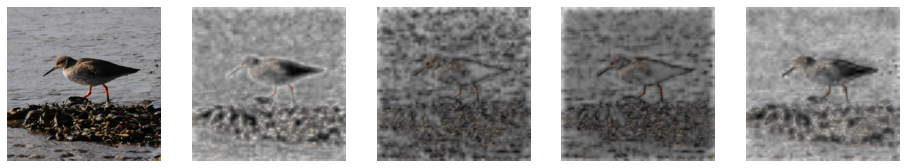

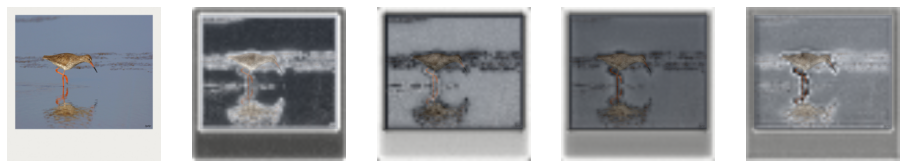

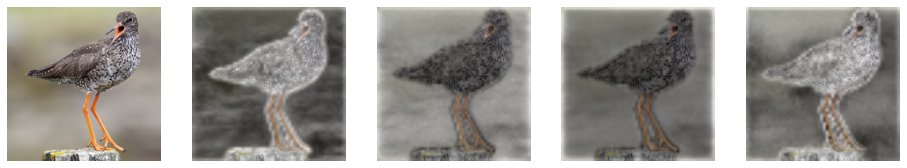

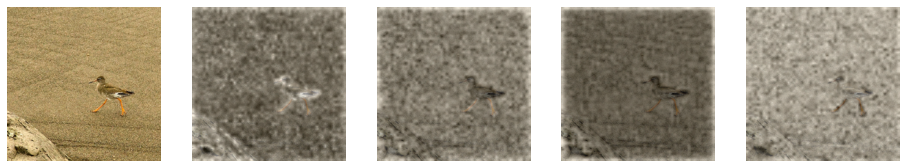

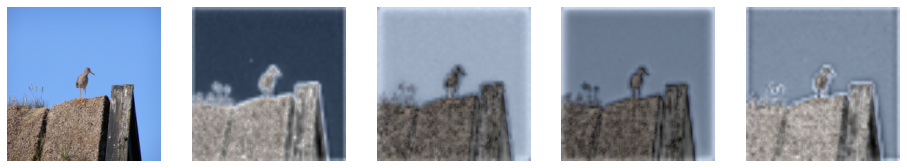

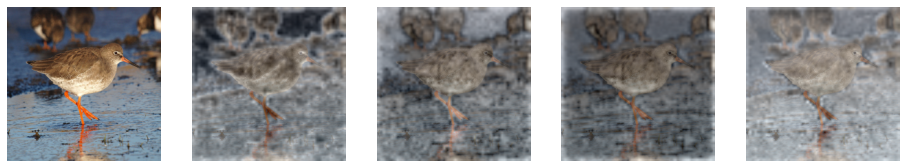

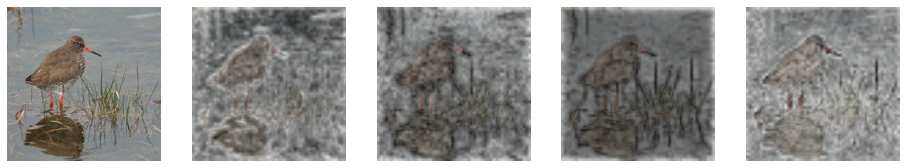

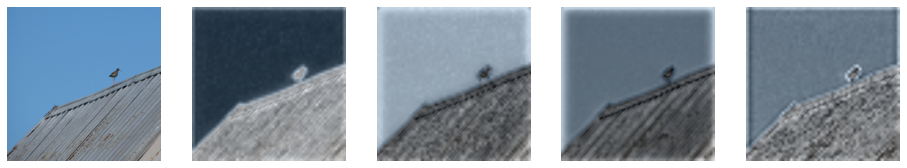

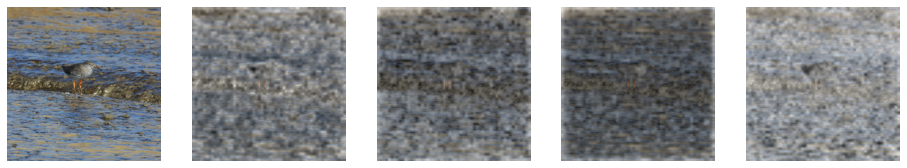

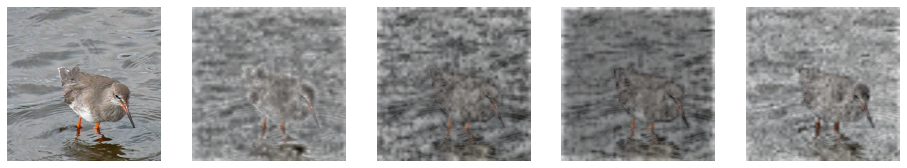

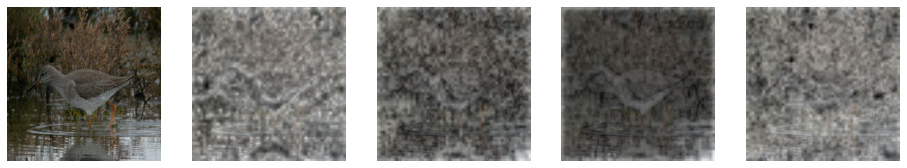

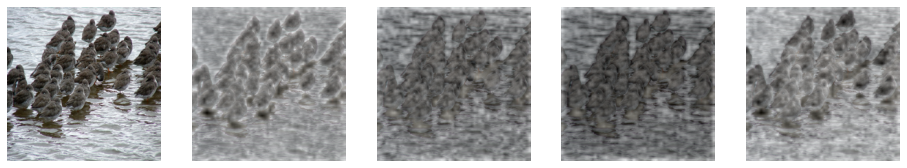

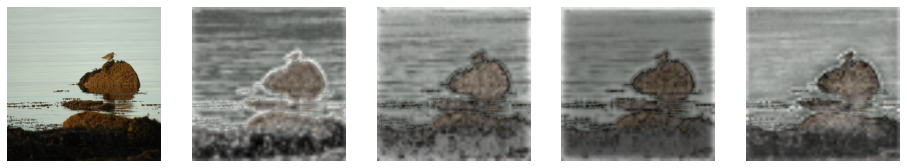

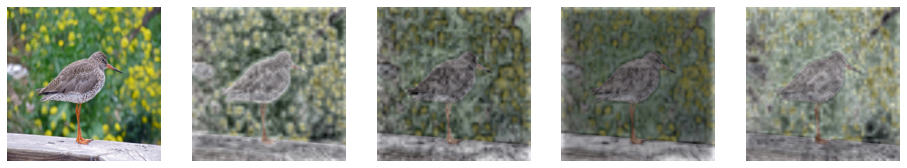

In [93]:
# iterate over images
import os
import numpy as np
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt

upsampler = nn.Upsample(scale_factor=4, mode='bilinear')
model.eval()
focal_weights_all = torch.zeros(2+2+6+2, 4)

layers = [2,2,6,2]

img_folder = "/datadrive/azureblobs/vlpdatasets/imagenet/val/n02028035/"
img_paths = os.listdir(img_folder)
for img_path in img_paths[0:20]:
    img = Image.open(img_folder + img_path)
    img_t = eval_transforms(img) 
    img_d = display_transforms(img)
    out = model(img_t.unsqueeze(0).cuda())    
    
#     offset = 0
#     for s, layer in enumerate(layers):
# #         print(model.layers[0].blocks[0].attn.focal_weights.shape)
# #         for l in range(layer):
#         l = layer-1
#         focal_weights = model.layers[s].blocks[l].attn.focal_weights[:,:,0,0]
#         print(model.layers[s].blocks[l].attn.focal_weights.shape)
#         focal_weights_all[offset+l, :] += focal_weights[0].cpu().detach()
#         offset += layer

# print(focal_weights_all)
#     print(model.layers[-1].blocks[0].attn.modulator.shape)
    fig=plt.figure(figsize=(16, 16))
    
    fig.add_subplot(1, 5, 1)       
    img2d = img_d.permute(1, 2, 0).cpu().detach().contiguous().numpy()
    x = plt.imshow(img_d.permute(1, 2, 0).cpu().detach().contiguous().numpy())     
    plt.axis('off')
    x.axes.get_xaxis().set_visible(False)
    x.axes.get_yaxis().set_visible(False)    

    """
    visualize modulator 
    """
#     fig.add_subplot(1, 2, 2)    
#     modulator = (model.layers[-1].blocks[-2].attn.modulator).mean(1, keepdim=True)
# #     print(modulator.shape)
#     modulator = (upsampler(modulator))
#     x = plt.imshow((modulator.squeeze(1)).permute(1, 2, 0).cpu().detach().contiguous().numpy())    
#     plt.axis('off')
#     x.axes.get_xaxis().set_visible(False)
#     x.axes.get_yaxis().set_visible(False)    
# #     fig=plt.figure(figsize=(8, 8))       
# #     plt.imshow(model.layers[-1].blocks[-2].attn.modulator.mean(1).permute(1, 2, 0).cpu().detach().contiguous().numpy())  
#     continue
    """
    visualize focal weights
    """
    focal_weights_1 = (model.layers[0].blocks[-1].attn.focal_weights)
    focal_weights_2 = (model.layers[0].blocks[-2].attn.focal_weights)
    focal_weights = focal_weights_1
#     fig=plt.figure(figsize=(8, 8))   
    for i in range(4):
        fig.add_subplot(1, 5, i+2)        
#         print(focal_weights[:, i].mean(), focal_weights[:, i].min(), focal_weights[:, i].max())
#         print(focal_weights.shape)
        focal_weights_i = (upsampler(focal_weights[:, i:i+1]))
        focal_weights_i = (focal_weights_i - focal_weights_i.min()) / (focal_weights_i.max()-focal_weights_i.min())
#         focalmap = returnMap(img_d.permute(1, 2, 0), focal_weights_i[0].permute(1, 2, 0))
        display = 0.3*img_d + 0.7*focal_weights_i[0].cpu().detach()
#         display = (display - display.min()) / (display.max() - display.min())
        plt.imshow(display.permute(1,2,0).numpy())        
#         plt.imshow(focal_weights_i[0].permute(1, 2, 0).cpu().detach().contiguous().numpy())
        plt.axis('off')
        x.axes.get_xaxis().set_visible(False)
        x.axes.get_yaxis().set_visible(False)    
    
#     fig=plt.figure(figsize=(8, 8))       
#     weight_map = focal_weights[0][:3]
#     plt.imshow(((weight_map-weight_map.min())/(weight_map.max()-weight_map.min())).permute(1, 2, 0).cpu().detach().contiguous().numpy())
#     fig.add_subplot(1, 2, 2)
#     plt.imshow(route_scores[0,:,:,:].mean(-1).detach().cpu().numpy())
#     plt.show()   
    
#     nheads = route_scores.shape[3]
#     fig = plt.figure(figsize=(16, 16))    
#     for i in range(1, nheads+1):
#         fig.add_subplot(1, nheads, i)
# #         print("head-{}-min:".format(i), torch.sigmoid(route_scores[0,:,:,i-1]).min())
# #         print("head-{}-max:".format(i), torch.sigmoid(route_scores[0,:,:,i-1].max()))
#         plt.imshow(route_scores[0,:,:,(i-1):i].detach().cpu().numpy())    
#     plt.show()
    # average over all heads
#     print(out.argmax())    
#     break
#     print("head-{}-min:", route_scores[0,:,:,:].mean(-1).min())
#     print("head-{}-max:", route_scores[0,:,:,:].mean(-1).max())  
    # aggregate last layers of all stages

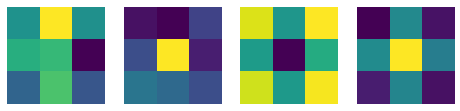

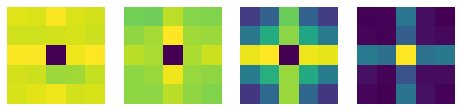

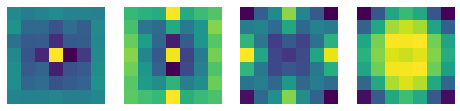

In [58]:
# display learned aggregation weights

# print(model.layers[0].blocks[0].attn.pool_layers[1][0].weight.shape)

fig=plt.figure(figsize=(8, 8))  
for id_layer in range(4):
    fig.add_subplot(1, 4, id_layer+1)
    x = plt.imshow(model.layers[id_layer].blocks[-1].attn.pool_layers[0][0].weight.data.mean(0).cpu().permute(1, 2, 0).contiguous().numpy())    
    plt.axis('off')
    x.axes.get_xaxis().set_visible(False)
    x.axes.get_yaxis().set_visible(False)
    
fig=plt.figure(figsize=(8, 8))   
for id_layer in range(4):
    fig.add_subplot(1, 4, id_layer+1)
    plt.imshow(model.layers[id_layer].blocks[-1].attn.pool_layers[1][0].weight.data.mean(0).cpu().permute(1, 2, 0).contiguous().numpy())
    plt.axis('off')
    x.axes.get_xaxis().set_visible(False)
    x.axes.get_yaxis().set_visible(False)
    
fig=plt.figure(figsize=(8, 8))   
for id_layer in range(4):
    fig.add_subplot(1, 4, id_layer+1)
    plt.imshow(model.layers[id_layer].blocks[-1].attn.pool_layers[2][0].weight.data.mean(0).cpu().permute(1, 2, 0).contiguous().numpy())    
    plt.axis('off')
    x.axes.get_xaxis().set_visible(False)
    x.axes.get_yaxis().set_visible(False)    